In [1]:
import torch

from torchmetrics import PearsonCorrCoef


target = torch.tensor([5.0, 6.0, 0.0, 2.0])

preds = torch.tensor([2.5, 4.57, 2, 1.5])

pearson = PearsonCorrCoef()

pearson(preds, target)

/data/ephemeral/home/miniconda3/envs/killy_RoBERTa/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


tensor(0.7692)

In [2]:
import pandas as pd

In [6]:
target_data = pd.read_csv('/data/ephemeral/home/donghyuk/data/dev.csv')
# predic_data = pd.read_csv('/data/ephemeral/home/donghyuk/lightning_logs/0.9302665_snunlp-KR-ELECTRA-discriminator/output_valid-0.9302665_snunlp-KR-ELECTRA-discriminator.csv')
# predic_data = pd.read_csv('/data/ephemeral/home/donghyuk/lightning_logs/0.9315944_snunlp-KR-ELECTRA-discriminator/output_valid-0.9315944_snunlp-KR-ELECTRA-discriminator.csv')
predic_data = pd.read_csv('/data/ephemeral/home/donghyuk/lightning_logs/0.978852_beomi-KcELECTRA-base/output_0.978852_beomi-KcELECTRA-base.csv')


predic_data['id'] = target_data['id']

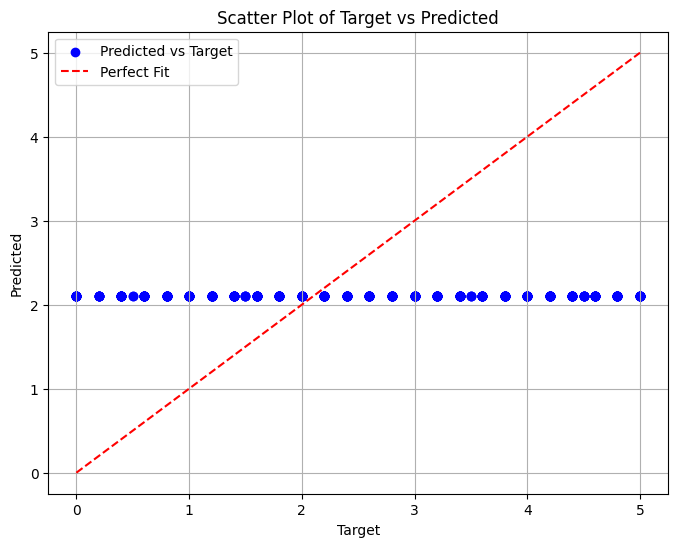

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(target_data['label'], predic_data['target'], color='blue', label='Predicted vs Target')

plt.xlabel('Target')
plt.ylabel('Predicted')
plt.title('Scatter Plot of Target vs Predicted')
plt.plot([target_data['label'].min(), target_data['label'].max()], [target_data['label'].min(), target_data['label'].max()], color='red', linestyle='--', label='Perfect Fit')
plt.legend()
plt.grid(True)
plt.show()



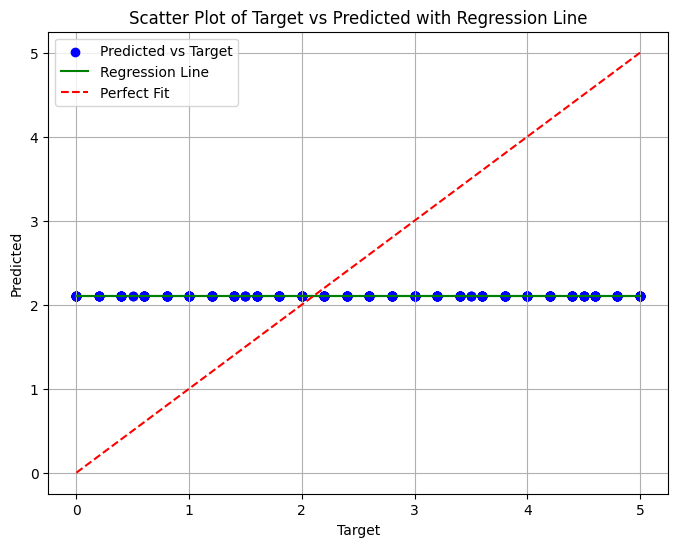

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# 회귀선을 그리기 위한 데이터 준비
x = target_data['label']
y = predic_data['target']

# 1차원 선형 회귀 모델 계산 (기울기와 절편을 구함)
slope, intercept = np.polyfit(x, y, 1)

# 회귀선에 해당하는 y값 계산
regression_line = slope * x + intercept

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Predicted vs Target')

# 회귀선 추가
plt.plot(x, regression_line, color='green', label='Regression Line')

# 완벽한 예측선을 추가 (y=x)
plt.plot([x.min(), x.max()], [x.min(), x.max()], color='red', linestyle='--', label='Perfect Fit')

plt.xlabel('Target')
plt.ylabel('Predicted')
plt.title('Scatter Plot of Target vs Predicted with Regression Line')
plt.legend()
plt.grid(True)
plt.show()


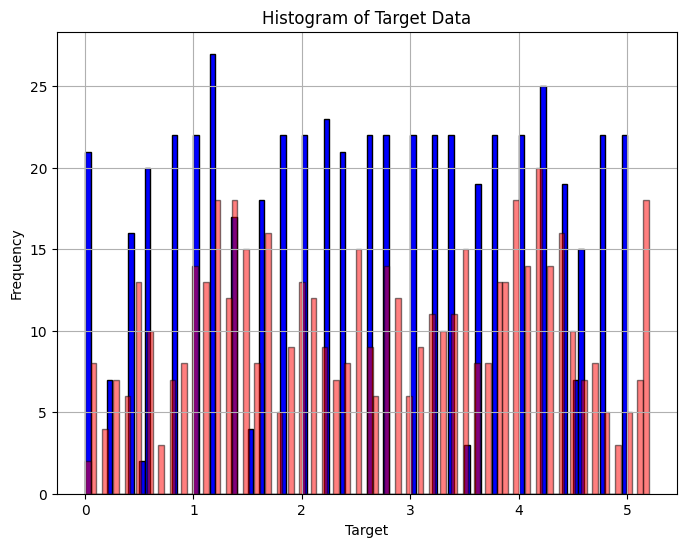

In [48]:
plt.figure(figsize=(8, 6))
plt.hist(target_data['label'], bins=100, color='blue', edgecolor='black')
plt.hist(predic_data['target'], bins=100, alpha=0.5, color='red', edgecolor='black')

plt.xlabel('Target')
plt.ylabel('Frequency')
plt.title('Histogram of Target Data')
plt.grid(True)
plt.show()

In [51]:


# 예측 데이터 프레임 (예: y_pred)


# 예측 값과 실제 값의 차이 계산
diff = predic_data['target'] - target_data['label']

# +1.0 또는 -1.0을 벗어나는 값 필터링
out_of_bounds = predic_data[abs(diff) > 1.5]

# 결과 출력
print("1.0 이상의 차이를 보이는 예측값:")
print(out_of_bounds)
print(len(out_of_bounds))


'''
==0.0 : 53
0.0 : 497 /550
0.1 : 460/550
0.5  : 147/550
1.0 : 35/550
1.5 : 8/550
2.0 : 3/550
2.5 : 0

'''


1.0 이상의 차이를 보이는 예측값:
                           id  target
29   boostcamp-sts-v1-dev-029     0.3
65   boostcamp-sts-v1-dev-065     4.3
151  boostcamp-sts-v1-dev-151     1.1
171  boostcamp-sts-v1-dev-171     3.6
288  boostcamp-sts-v1-dev-288     4.3
390  boostcamp-sts-v1-dev-390     3.6
454  boostcamp-sts-v1-dev-454     3.8
528  boostcamp-sts-v1-dev-528     3.4
8


'\n==0.0 : 53\n0.0 : 497 /550\n0.1 : 460/550\n0.5  : 147/550\n1.0 : 35/550\n1.5 : 8/550\n2.0 : 3/550\n2.5 : 0\n\n'

In [ ]:
#====================================================================#
#====================================================================#

In [ ]:
pd.read_csv('')